In [1]:
# Parameters
file_path = "WMT.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,52.203335,52.799999,52.169998,52.700001,51.998066,14210400
1,2023-08-24,52.709999,53.076668,52.273335,52.296665,51.600101,14033100
2,2023-08-25,52.393333,52.680000,52.180000,52.606667,51.905975,12267000
3,2023-08-28,52.619999,52.943333,52.619999,52.906666,52.201977,11871000
4,2023-08-29,53.000000,53.410000,52.953335,53.349998,52.639408,12702300
...,...,...,...,...,...,...,...
247,2024-08-16,72.699997,73.610001,72.519997,73.449997,73.449997,19872100
248,2024-08-19,73.389999,73.980003,73.339996,73.720001,73.720001,13709300
249,2024-08-20,73.750000,74.750000,73.720001,74.540001,74.540001,14434000
250,2024-08-21,75.300003,75.580002,74.589996,75.239998,75.239998,14832000


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,52.700001
1,2023-08-24,52.296665
2,2023-08-25,52.606667
3,2023-08-28,52.906666
4,2023-08-29,53.349998
...,...,...
247,2024-08-16,73.449997
248,2024-08-19,73.720001
249,2024-08-20,74.540001
250,2024-08-21,75.239998


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88381/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,52.700001
2023-08-24,52.296665
2023-08-25,52.606667
2023-08-28,52.906666
2023-08-29,53.349998
...,...
2024-08-16,73.449997
2024-08-19,73.720001
2024-08-20,74.540001


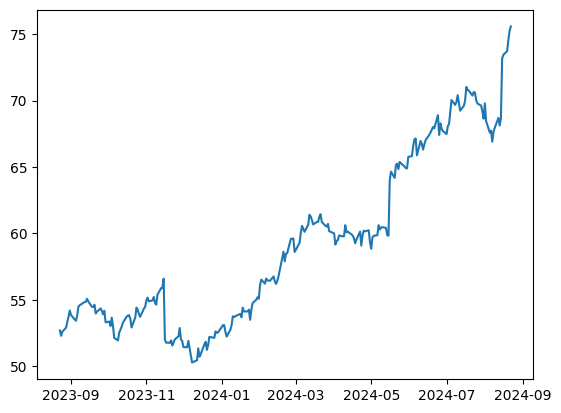

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,52.700001,52.296665,52.606667,52.906666,53.349998,53.733334,54.203335,53.856667,53.423332,...,54.116669,54.356667,54.166668,53.906666,54.180000,53.310001,53.366669,53.029999,53.666668,53.026669
1,2023-10-06,52.296665,52.606667,52.906666,53.349998,53.733334,54.203335,53.856667,53.423332,53.823334,...,54.356667,54.166668,53.906666,54.180000,53.310001,53.366669,53.029999,53.666668,53.026669,52.136665
2,2023-10-09,52.606667,52.906666,53.349998,53.733334,54.203335,53.856667,53.423332,53.823334,54.490002,...,54.166668,53.906666,54.180000,53.310001,53.366669,53.029999,53.666668,53.026669,52.136665,51.946667
3,2023-10-10,52.906666,53.349998,53.733334,54.203335,53.856667,53.423332,53.823334,54.490002,54.590000,...,53.906666,54.180000,53.310001,53.366669,53.029999,53.666668,53.026669,52.136665,51.946667,52.533333
4,2023-10-11,53.349998,53.733334,54.203335,53.856667,53.423332,53.823334,54.490002,54.590000,54.779999,...,54.180000,53.310001,53.366669,53.029999,53.666668,53.026669,52.136665,51.946667,52.533333,52.743332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,70.040001,69.680000,69.900002,70.410004,69.800003,69.239998,69.610001,69.989998,71.029999,...,67.589996,67.739998,66.910004,67.660004,67.949997,68.699997,68.129997,68.660004,73.180000,73.449997
218,2024-08-19,69.680000,69.900002,70.410004,69.800003,69.239998,69.610001,69.989998,71.029999,70.820000,...,67.739998,66.910004,67.660004,67.949997,68.699997,68.129997,68.660004,73.180000,73.449997,73.720001
219,2024-08-20,69.900002,70.410004,69.800003,69.239998,69.610001,69.989998,71.029999,70.820000,70.750000,...,66.910004,67.660004,67.949997,68.699997,68.129997,68.660004,73.180000,73.449997,73.720001,74.540001
220,2024-08-21,70.410004,69.800003,69.239998,69.610001,69.989998,71.029999,70.820000,70.750000,70.379997,...,67.660004,67.949997,68.699997,68.129997,68.660004,73.180000,73.449997,73.720001,74.540001,75.239998


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

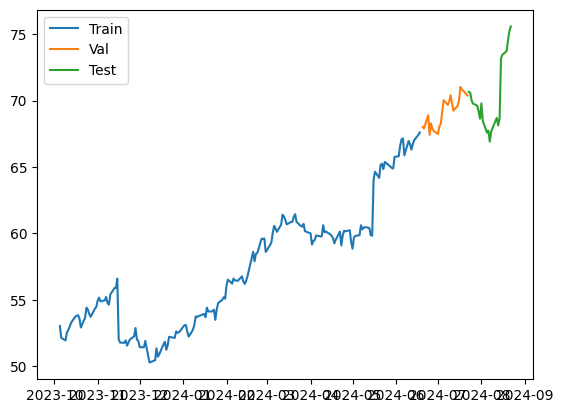

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 798ms/step - loss: 3304.0315 - mean_absolute_error: 57.2863

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3284.7451 - mean_absolute_error: 57.1094 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3264.7744 - mean_absolute_error: 56.9397 - val_loss: 4507.1230 - val_mean_absolute_error: 67.1247


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3189.6938 - mean_absolute_error: 56.3059

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3026.9741 - mean_absolute_error: 54.8021

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2979.5408 - mean_absolute_error: 54.3596 - val_loss: 3696.4688 - val_mean_absolute_error: 60.7866


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2530.8943 - mean_absolute_error: 50.0535

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2219.5166 - mean_absolute_error: 46.7011

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2116.9719 - mean_absolute_error: 45.5115 - val_loss: 1741.5880 - val_mean_absolute_error: 41.7130


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 799.1517 - mean_absolute_error: 27.8360

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 564.9796 - mean_absolute_error: 22.2627

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 498.7893 - mean_absolute_error: 20.3535 - val_loss: 1.9134 - val_mean_absolute_error: 1.2102


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 237.9761 - mean_absolute_error: 14.4253

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 316.8076 - mean_absolute_error: 16.8014

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 318.5098 - mean_absolute_error: 16.8454 - val_loss: 20.4715 - val_mean_absolute_error: 4.3475


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 89.4386 - mean_absolute_error: 8.3904

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 65.2494 - mean_absolute_error: 6.9009

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 61.2934 - mean_absolute_error: 6.6277 - val_loss: 428.7696 - val_mean_absolute_error: 20.6711


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 101.9127 - mean_absolute_error: 8.9894

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 106.9534 - mean_absolute_error: 9.1865

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 105.5299 - mean_absolute_error: 9.0912 - val_loss: 360.3979 - val_mean_absolute_error: 18.9457


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 60.8941 - mean_absolute_error: 5.8063

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 56.6837 - mean_absolute_error: 5.7796

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 53.3250 - mean_absolute_error: 5.5827

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 48.4089 - mean_absolute_error: 5.3252

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 46.9978 - mean_absolute_error: 5.2572 - val_loss: 96.8952 - val_mean_absolute_error: 9.7692


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 26.5541 - mean_absolute_error: 4.1158

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 30.6908 - mean_absolute_error: 4.4914

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 34.5360 - mean_absolute_error: 4.8308

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 36.3716 - mean_absolute_error: 4.9883 - val_loss: 70.8647 - val_mean_absolute_error: 8.3316


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 47.4144 - mean_absolute_error: 5.9449

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.9255 - mean_absolute_error: 5.0566

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.1710 - mean_absolute_error: 4.9363 - val_loss: 191.6216 - val_mean_absolute_error: 13.7909


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 30.6842 - mean_absolute_error: 4.4609

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 30.0840 - mean_absolute_error: 4.4294

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 28.7666 - mean_absolute_error: 4.3281 - val_loss: 193.2908 - val_mean_absolute_error: 13.8515


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 24.1619 - mean_absolute_error: 3.9322

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24.5598 - mean_absolute_error: 4.0586

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23.8354 - mean_absolute_error: 4.0299 - val_loss: 131.1763 - val_mean_absolute_error: 11.3908


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.6522 - mean_absolute_error: 4.0565

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.7906 - mean_absolute_error: 4.0951

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.1334 - mean_absolute_error: 4.1204 - val_loss: 123.1780 - val_mean_absolute_error: 11.0343


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26.0902 - mean_absolute_error: 4.3202

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.4703 - mean_absolute_error: 4.2362

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.9847 - mean_absolute_error: 4.2039 - val_loss: 159.2402 - val_mean_absolute_error: 12.5628


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.4005 - mean_absolute_error: 4.3171

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.2048 - mean_absolute_error: 4.1712

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.7613 - mean_absolute_error: 4.1388 - val_loss: 161.1202 - val_mean_absolute_error: 12.6375


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.3802 - mean_absolute_error: 4.4616

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.8363 - mean_absolute_error: 4.1372

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.5400 - mean_absolute_error: 4.0983 - val_loss: 136.4809 - val_mean_absolute_error: 11.6220


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.5931 - mean_absolute_error: 4.0691

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.7282 - mean_absolute_error: 3.9893

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 21.5802 - mean_absolute_error: 3.9840 - val_loss: 132.7778 - val_mean_absolute_error: 11.4617


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 19.3325 - mean_absolute_error: 3.5878

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 19.2106 - mean_absolute_error: 3.6509

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 19.2531 - mean_absolute_error: 3.6857

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 19.3683 - mean_absolute_error: 3.7114

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 19.7308 - mean_absolute_error: 3.7664 - val_loss: 147.2702 - val_mean_absolute_error: 12.0776


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 25.2900 - mean_absolute_error: 4.2295

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 22.5518 - mean_absolute_error: 4.0358

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21.4149 - mean_absolute_error: 3.9420

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 21.2673 - mean_absolute_error: 3.9310 - val_loss: 125.3530 - val_mean_absolute_error: 11.1335


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.6826 - mean_absolute_error: 4.0853

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.2099 - mean_absolute_error: 3.8555

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 20.1543 - mean_absolute_error: 3.8376 - val_loss: 147.6186 - val_mean_absolute_error: 12.0923


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.1759 - mean_absolute_error: 4.0148

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21.4908 - mean_absolute_error: 3.9354

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.5327 - mean_absolute_error: 3.8382 - val_loss: 120.9260 - val_mean_absolute_error: 10.9335


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.6487 - mean_absolute_error: 3.9279

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.8021 - mean_absolute_error: 3.8893

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 19.8246 - mean_absolute_error: 3.7882 - val_loss: 132.0921 - val_mean_absolute_error: 11.4334


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.3699 - mean_absolute_error: 3.6365

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.4154 - mean_absolute_error: 3.5281

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.5393 - mean_absolute_error: 3.5394 - val_loss: 120.9562 - val_mean_absolute_error: 10.9358


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 20.5899 - mean_absolute_error: 3.9819

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.3901 - mean_absolute_error: 3.8898

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.7306 - mean_absolute_error: 3.8134 - val_loss: 117.4904 - val_mean_absolute_error: 10.7766


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.2283 - mean_absolute_error: 3.4238

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.3263 - mean_absolute_error: 3.5364

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.8608 - mean_absolute_error: 3.5050 - val_loss: 128.0865 - val_mean_absolute_error: 11.2583


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 22.3555 - mean_absolute_error: 4.0332

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.4783 - mean_absolute_error: 3.5796

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.2709 - mean_absolute_error: 3.4464 - val_loss: 111.6571 - val_mean_absolute_error: 10.5035


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.5592 - mean_absolute_error: 3.2463

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.7468 - mean_absolute_error: 3.1676

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.8582 - mean_absolute_error: 3.1820 - val_loss: 112.0033 - val_mean_absolute_error: 10.5209


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.1100 - mean_absolute_error: 3.1105

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.2066 - mean_absolute_error: 3.1240

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.0133 - mean_absolute_error: 3.1192 - val_loss: 114.8323 - val_mean_absolute_error: 10.6552


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.1752 - mean_absolute_error: 2.8451

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.2286 - mean_absolute_error: 2.9541

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.5364 - mean_absolute_error: 3.0022 - val_loss: 93.1370 - val_mean_absolute_error: 9.5831


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.3514 - mean_absolute_error: 3.0269

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.9376 - mean_absolute_error: 2.9736

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.7171 - mean_absolute_error: 2.9401

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.6298 - mean_absolute_error: 2.9219

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.7152 - mean_absolute_error: 2.9194 - val_loss: 102.4861 - val_mean_absolute_error: 10.0607


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.3423 - mean_absolute_error: 3.0820

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.6207 - mean_absolute_error: 2.8782

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0945 - mean_absolute_error: 2.8112 - val_loss: 82.3735 - val_mean_absolute_error: 9.0064


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9018 - mean_absolute_error: 2.7844

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.8062 - mean_absolute_error: 2.5521

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.6601 - mean_absolute_error: 2.5333 - val_loss: 90.8631 - val_mean_absolute_error: 9.4687


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7555 - mean_absolute_error: 2.2012

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.7688 - mean_absolute_error: 2.3390

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.0311 - mean_absolute_error: 2.3588 - val_loss: 76.3213 - val_mean_absolute_error: 8.6667


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.9270 - mean_absolute_error: 2.3459

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.8465 - mean_absolute_error: 2.1396

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6839 - mean_absolute_error: 2.1127 - val_loss: 63.7740 - val_mean_absolute_error: 7.9131


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.4121 - mean_absolute_error: 1.6424

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4297 - mean_absolute_error: 1.6398

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3569 - mean_absolute_error: 1.6403 - val_loss: 42.8971 - val_mean_absolute_error: 6.4556


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7993 - mean_absolute_error: 1.4395

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.9366 - mean_absolute_error: 1.6620

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.0712 - mean_absolute_error: 1.6719 - val_loss: 48.5402 - val_mean_absolute_error: 6.8850


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.4734 - mean_absolute_error: 1.8006

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2677 - mean_absolute_error: 1.7655

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.2371 - mean_absolute_error: 1.7833 - val_loss: 22.0689 - val_mean_absolute_error: 4.5644


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.0290 - mean_absolute_error: 2.4399

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2663 - mean_absolute_error: 2.0311

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.9190 - mean_absolute_error: 1.9463 - val_loss: 21.8013 - val_mean_absolute_error: 4.5362


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9059 - mean_absolute_error: 1.1030

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0885 - mean_absolute_error: 1.1198

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.0834 - mean_absolute_error: 1.1161 - val_loss: 25.0298 - val_mean_absolute_error: 4.8897


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7369 - mean_absolute_error: 0.9324

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5374 - mean_absolute_error: 0.9189

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.5477 - mean_absolute_error: 0.9278 - val_loss: 14.9841 - val_mean_absolute_error: 3.7158


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2497 - mean_absolute_error: 0.8519

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4332 - mean_absolute_error: 0.9242

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3983 - mean_absolute_error: 0.9193 - val_loss: 9.7295 - val_mean_absolute_error: 2.9391


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4244 - mean_absolute_error: 0.9100

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1710 - mean_absolute_error: 0.8273

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1347 - mean_absolute_error: 0.8158 - val_loss: 7.0016 - val_mean_absolute_error: 2.4285


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7201 - mean_absolute_error: 0.6643

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0363 - mean_absolute_error: 0.7777

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1126 - mean_absolute_error: 0.8072 - val_loss: 5.2607 - val_mean_absolute_error: 2.0571


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3682 - mean_absolute_error: 1.0506

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1645 - mean_absolute_error: 0.9000

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1402 - mean_absolute_error: 0.8786 - val_loss: 6.3290 - val_mean_absolute_error: 2.3304


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9145 - mean_absolute_error: 0.7507

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8555 - mean_absolute_error: 0.7070

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8904 - mean_absolute_error: 0.7126 - val_loss: 4.6528 - val_mean_absolute_error: 1.9012


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6214 - mean_absolute_error: 0.5550

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2079 - mean_absolute_error: 0.8237

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2038 - mean_absolute_error: 0.8298 - val_loss: 3.3904 - val_mean_absolute_error: 1.5467


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8864 - mean_absolute_error: 1.0724

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3061 - mean_absolute_error: 0.8680

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2461 - mean_absolute_error: 0.8510 - val_loss: 3.2897 - val_mean_absolute_error: 1.5227


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0218 - mean_absolute_error: 0.8959

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1883 - mean_absolute_error: 0.8902

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1953 - mean_absolute_error: 0.8863 - val_loss: 3.9018 - val_mean_absolute_error: 1.7193


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6112 - mean_absolute_error: 0.5927

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0940 - mean_absolute_error: 0.8178

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1134 - mean_absolute_error: 0.8264 - val_loss: 5.8335 - val_mean_absolute_error: 2.2568


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.4607 - mean_absolute_error: 0.7979

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2606 - mean_absolute_error: 0.7875

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2127 - mean_absolute_error: 0.7883 - val_loss: 4.6078 - val_mean_absolute_error: 1.9112


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9980 - mean_absolute_error: 0.7878

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0226 - mean_absolute_error: 0.7904

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9815 - mean_absolute_error: 0.7726 - val_loss: 5.7533 - val_mean_absolute_error: 2.2264


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9850 - mean_absolute_error: 0.7853

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8530 - mean_absolute_error: 0.6878

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8654 - mean_absolute_error: 0.6872 - val_loss: 3.9232 - val_mean_absolute_error: 1.7100


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3091 - mean_absolute_error: 0.4455

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5369 - mean_absolute_error: 0.5397

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5789 - mean_absolute_error: 0.5553 - val_loss: 4.3085 - val_mean_absolute_error: 1.8255


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3292 - mean_absolute_error: 0.4627

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6316 - mean_absolute_error: 0.5532

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6298 - mean_absolute_error: 0.5493 - val_loss: 4.0206 - val_mean_absolute_error: 1.7394


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4263 - mean_absolute_error: 0.5037

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5165 - mean_absolute_error: 0.5152

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5622 - mean_absolute_error: 0.5311 - val_loss: 3.8322 - val_mean_absolute_error: 1.6843


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9092 - mean_absolute_error: 0.6286

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7870 - mean_absolute_error: 0.6071

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7706 - mean_absolute_error: 0.6084 - val_loss: 3.3830 - val_mean_absolute_error: 1.5540


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5038 - mean_absolute_error: 0.5849

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7034 - mean_absolute_error: 0.6358

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7392 - mean_absolute_error: 0.6431 - val_loss: 3.7020 - val_mean_absolute_error: 1.6625


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4077 - mean_absolute_error: 0.6996

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8558 - mean_absolute_error: 0.5794

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7821 - mean_absolute_error: 0.5673 - val_loss: 3.7242 - val_mean_absolute_error: 1.6619


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4051 - mean_absolute_error: 0.8199

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9194 - mean_absolute_error: 0.6790

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8671 - mean_absolute_error: 0.6631 - val_loss: 4.0280 - val_mean_absolute_error: 1.7687


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8410 - mean_absolute_error: 0.6675

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6977 - mean_absolute_error: 0.5840

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7103 - mean_absolute_error: 0.5837 - val_loss: 3.4608 - val_mean_absolute_error: 1.5856


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5191 - mean_absolute_error: 0.5204

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6316 - mean_absolute_error: 0.5605

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6311 - mean_absolute_error: 0.5616 - val_loss: 3.3783 - val_mean_absolute_error: 1.5606


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2474 - mean_absolute_error: 0.4022

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5576 - mean_absolute_error: 0.5179

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5806 - mean_absolute_error: 0.5319 - val_loss: 3.4009 - val_mean_absolute_error: 1.5742


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5039 - mean_absolute_error: 0.5716

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8187 - mean_absolute_error: 0.6425

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8031 - mean_absolute_error: 0.6410 - val_loss: 2.9648 - val_mean_absolute_error: 1.4396


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2308 - mean_absolute_error: 0.8644

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8969 - mean_absolute_error: 0.6882

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9010 - mean_absolute_error: 0.6811 - val_loss: 3.3296 - val_mean_absolute_error: 1.5508


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2891 - mean_absolute_error: 0.4434

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6451 - mean_absolute_error: 0.5744

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6751 - mean_absolute_error: 0.5930 - val_loss: 3.3496 - val_mean_absolute_error: 1.5568


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7105 - mean_absolute_error: 0.5191

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5458 - mean_absolute_error: 0.4832

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5541 - mean_absolute_error: 0.4921 - val_loss: 3.2973 - val_mean_absolute_error: 1.5467


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3681 - mean_absolute_error: 0.4228

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5842 - mean_absolute_error: 0.5105

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5808 - mean_absolute_error: 0.5123 - val_loss: 3.4335 - val_mean_absolute_error: 1.5795


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5112 - mean_absolute_error: 0.5741

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5947 - mean_absolute_error: 0.5483

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5894 - mean_absolute_error: 0.5451 - val_loss: 3.6585 - val_mean_absolute_error: 1.6581


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7713 - mean_absolute_error: 0.4659

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6418 - mean_absolute_error: 0.4887

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6251 - mean_absolute_error: 0.4945 - val_loss: 3.7401 - val_mean_absolute_error: 1.6752


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8925 - mean_absolute_error: 0.6498

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7097 - mean_absolute_error: 0.5910

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6778 - mean_absolute_error: 0.5810 - val_loss: 4.0908 - val_mean_absolute_error: 1.7822


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4970 - mean_absolute_error: 0.6272

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7173 - mean_absolute_error: 0.6049

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7016 - mean_absolute_error: 0.5903 - val_loss: 4.6697 - val_mean_absolute_error: 1.9453


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5938 - mean_absolute_error: 0.6341

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6357 - mean_absolute_error: 0.6237

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6707 - mean_absolute_error: 0.6282 - val_loss: 4.4064 - val_mean_absolute_error: 1.8773


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5253 - mean_absolute_error: 0.5859

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6652 - mean_absolute_error: 0.5678

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6538 - mean_absolute_error: 0.5595 - val_loss: 3.9582 - val_mean_absolute_error: 1.7501


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3825 - mean_absolute_error: 0.4725

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5760 - mean_absolute_error: 0.5554

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5990 - mean_absolute_error: 0.5599 - val_loss: 3.7487 - val_mean_absolute_error: 1.6926


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4994 - mean_absolute_error: 0.5444

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5495 - mean_absolute_error: 0.5047

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5588 - mean_absolute_error: 0.5068 - val_loss: 2.9528 - val_mean_absolute_error: 1.4467


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3358 - mean_absolute_error: 0.4595

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5430 - mean_absolute_error: 0.5532

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5909 - mean_absolute_error: 0.5693 - val_loss: 2.5786 - val_mean_absolute_error: 1.3244


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8001 - mean_absolute_error: 0.6357

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9595 - mean_absolute_error: 0.6992

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9286 - mean_absolute_error: 0.6992 - val_loss: 2.9158 - val_mean_absolute_error: 1.4373


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7218 - mean_absolute_error: 0.6328

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6812 - mean_absolute_error: 0.6006

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6784 - mean_absolute_error: 0.5974 - val_loss: 3.6570 - val_mean_absolute_error: 1.6737


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4312 - mean_absolute_error: 0.4678

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4263 - mean_absolute_error: 0.4923

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4811 - mean_absolute_error: 0.5081 - val_loss: 3.2385 - val_mean_absolute_error: 1.5403


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4196 - mean_absolute_error: 0.5433

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6127 - mean_absolute_error: 0.5427

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5972 - mean_absolute_error: 0.5355 - val_loss: 3.2949 - val_mean_absolute_error: 1.5609


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3685 - mean_absolute_error: 0.5013

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6468 - mean_absolute_error: 0.5698

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6254 - mean_absolute_error: 0.5570 - val_loss: 2.9998 - val_mean_absolute_error: 1.4649


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0916 - mean_absolute_error: 0.5957

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7229 - mean_absolute_error: 0.5349

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6810 - mean_absolute_error: 0.5317 - val_loss: 3.5946 - val_mean_absolute_error: 1.6567


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7359 - mean_absolute_error: 0.5274

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5880 - mean_absolute_error: 0.5206

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5849 - mean_absolute_error: 0.5187 - val_loss: 3.5814 - val_mean_absolute_error: 1.6568


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5103 - mean_absolute_error: 0.4930

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5640 - mean_absolute_error: 0.5040

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5713 - mean_absolute_error: 0.5065 - val_loss: 3.5617 - val_mean_absolute_error: 1.6448


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5383 - mean_absolute_error: 0.5147

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6456 - mean_absolute_error: 0.5715

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6493 - mean_absolute_error: 0.5701 - val_loss: 4.8024 - val_mean_absolute_error: 2.0110


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7273 - mean_absolute_error: 0.7619

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6562 - mean_absolute_error: 0.6681

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6934 - mean_absolute_error: 0.6655 - val_loss: 3.9709 - val_mean_absolute_error: 1.7757


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0336 - mean_absolute_error: 0.7876

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8608 - mean_absolute_error: 0.6691

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8232 - mean_absolute_error: 0.6456 - val_loss: 4.2130 - val_mean_absolute_error: 1.8501


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7588 - mean_absolute_error: 0.7145

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6478 - mean_absolute_error: 0.6246

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6869 - mean_absolute_error: 0.6236 - val_loss: 2.9867 - val_mean_absolute_error: 1.4696


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3511 - mean_absolute_error: 0.4977

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4622 - mean_absolute_error: 0.5209

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5193 - mean_absolute_error: 0.5349 - val_loss: 2.8728 - val_mean_absolute_error: 1.4367


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4409 - mean_absolute_error: 0.4868

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5734 - mean_absolute_error: 0.5228

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5679 - mean_absolute_error: 0.5195 - val_loss: 3.0381 - val_mean_absolute_error: 1.4864


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5660 - mean_absolute_error: 0.5762

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5530 - mean_absolute_error: 0.5221

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5528 - mean_absolute_error: 0.5187 - val_loss: 3.6087 - val_mean_absolute_error: 1.6718


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4563 - mean_absolute_error: 0.5820

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6006 - mean_absolute_error: 0.5873

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6136 - mean_absolute_error: 0.5812 - val_loss: 3.6253 - val_mean_absolute_error: 1.6783


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3892 - mean_absolute_error: 0.5118

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5144 - mean_absolute_error: 0.5082

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5275 - mean_absolute_error: 0.5072 - val_loss: 2.9840 - val_mean_absolute_error: 1.4657


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2533 - mean_absolute_error: 0.4124

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3479 - mean_absolute_error: 0.4519

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4387 - mean_absolute_error: 0.4821 - val_loss: 3.0242 - val_mean_absolute_error: 1.4830


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7225 - mean_absolute_error: 0.5583

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6795 - mean_absolute_error: 0.5261

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6467 - mean_absolute_error: 0.5239 - val_loss: 2.4762 - val_mean_absolute_error: 1.3038


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4304 - mean_absolute_error: 0.5141

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3980 - mean_absolute_error: 0.4792

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4662 - mean_absolute_error: 0.4961 - val_loss: 2.7858 - val_mean_absolute_error: 1.4107


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8273 - mean_absolute_error: 0.5568

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5873 - mean_absolute_error: 0.5117

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5668 - mean_absolute_error: 0.5094 - val_loss: 2.7796 - val_mean_absolute_error: 1.4044


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5119 - mean_absolute_error: 0.5398

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5658 - mean_absolute_error: 0.5449

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5674 - mean_absolute_error: 0.5387 - val_loss: 2.4130 - val_mean_absolute_error: 1.2897


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0278 - mean_absolute_error: 0.5946

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6720 - mean_absolute_error: 0.5360

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6476 - mean_absolute_error: 0.5324 - val_loss: 2.7543 - val_mean_absolute_error: 1.4055


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8828 - mean_absolute_error: 0.5225

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6416 - mean_absolute_error: 0.5031

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5901 - mean_absolute_error: 0.4988 - val_loss: 2.2579 - val_mean_absolute_error: 1.2417


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


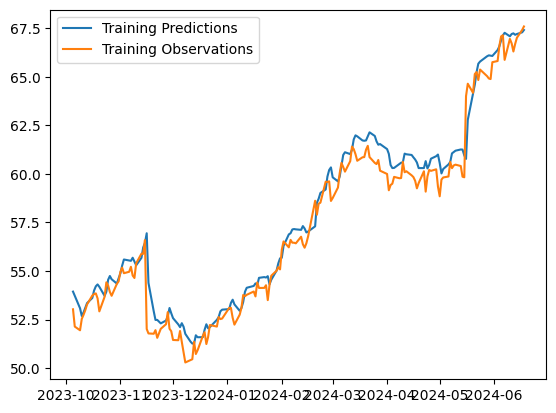

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


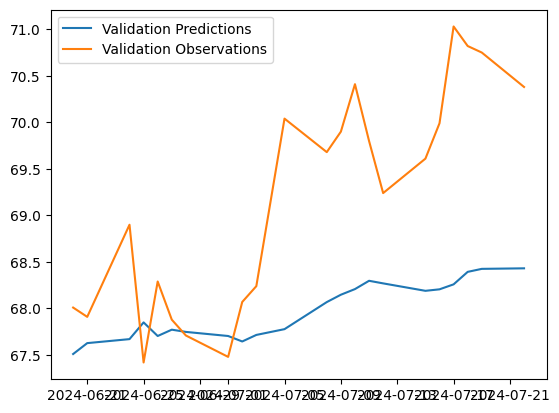

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


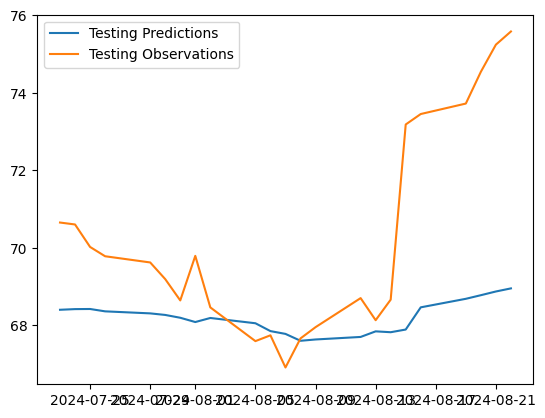

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
